# Машинное обучение

### `matplotlib` и визуализация данных

Мария Такташева

### Полезные ссылки

* https://google.com/
* https://stackoverflow.com/
* https://docs.python.org/3/
* https://pandas.pydata.org/pandas-docs/stable/
* https://docs.scipy.org/doc/numpy/reference/
* https://matplotlib.org/contents.html
* http://scikit-learn.org/stable/documentation.html

# Пакет `matplotlib`

#### Для чего он нужен? 
Для построения качественных графиков любого уровня сложности

#### Почему используем `matplotlib`?
- Все базовые графики можно нарисовать одной строчкой
- Очень много возможностей для изменения и тонкой настройки графиков
- Очень обширная документация с множеством примеров
- Многие другие пакеты наследуют его синтаксис 

#### В чем могут быть проблемы?
- Построить базовый график достаточно легко, но, чтобы научиться делать что-то сложнее, требуется немного опыта
- Библиотека огромная, больше 50 000 строк кода
- Многие вещи можно сделать несколькими разными способами

## Примеры графиков

### Line plot
<img src='http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.png' width="500">

### Bar plot

<img src='https://scentellegher.github.io//assets/images/post/2018_10_10_hist2.png' width="600">

### Multiple density plots

<img src='https://www.machinelearningplus.com/wp-content/uploads/2018/11/24_JoyPlot_joypy-min-1024x741.png' width="600">

### Time series

<img src='https://www.machinelearningplus.com/wp-content/uploads/2018/11/36_TimeSeries_Peaks_Troughs_Matplotlib-min-1024x640.png' width="700">

### И многое другое...

<img src='https://matplotlib.org/_images/scatter_symbol.png' width="500"> 

А теперь начнем

## Знакомство с библиотекой

### Импорт  

В самой библиотеке есть множество различных модулей, отвечающих за разные задачи (например, за рендеринг графиков, настройку стиля, более точную работу с наполнением графика). В этом семинаре мы будем использовать модуль `pyplot` — он достаточно простой, но все равно позволяет контролировать вид графика, стиль линий, шрифты, свойства осей или рисовать несколько графиков на одной картинке.

Импортируем его. Короткое имя `plt` используется всеми, аналогично `pd` в `pandas`

In [0]:
import matplotlib.pyplot as plt

По умолчанию, `matplotlib` открывает графики в новом окне. Для того, чтобы графики показывались прямо в jupyter notebook (в этой тетради или в Google Colab), мы используем команду:

In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina' 

Эта команда относится не к Python, а к самому Jupyter Notebook. Вторая строка позволяет получать графики высокого разрешения.

### Иерархия объектов

Уже изученный пакет Pandas позволяет рисовать простые графики при помощи команды `.plot()`. Однако для того, чтобы уверенно пользоваться `matplotlib`, важно понять иерархию объектов. 

Любой график включает в себя следующие компоненты:

`Figure` — основной контейнер для графики в `matplotlib`. Можно представлять это как чистый лист, на котором мы можем рисовать один или несколько графиков. Каждый график (`Axes`) состоит из двух осей (ось — `Axis`), поэтому и называется `Axes` (множественное число от `Axis`).

<img src='https://files.realpython.com/media/fig_map.bc8c7cabd823.png' width="500">

#### Анатомия графика 

Каждый график (`Axes`) состоит из различных элементов, расположенных без определенной иерархии. Мы можем добавлять их один за одним почти в любом порядке: например, линию, затем другую линию, точки, сетку, название осей, заголовок и т. д.

Чтобы изменить какой-то элемент, необязательно менять график целиком. Достаточно изменить строку, отвечающую за этот элемент.

<img src='https://matplotlib.org/_images/anatomy.png' width="500">

### Давайте посмотрим, как это работает

Загружаем классический датасет про виды ирисов: https://archive.ics.uci.edu/ml/datasets/Iris

Попробуем графически проанализировать отношение между длиной и шириной лепестков (`petal_length` и `petal_width`).

In [0]:
import pandas as pd
from sklearn.datasets import load_iris

# загружаем данные
data, target = load_iris(return_X_y=True)
data = pd.DataFrame(data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
data['class'] = target

# соответсвие номеров классов
classes = {
    0: 'Iris Setosa', 
    1: 'Iris Versicolour', 
    2: 'Iris Virginica'
}

#### Создаем `figure`

In [9]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

#### Добавляем значения на оси (`axis`) графика

Функции `plot`, `scatter` или `bar` делают это автоматически, нужно только передать данные в нужном порядке. 

Примеры функций: https://matplotlib.org/3.1.0/tutorials/introductory/sample_plots.html

Порядок осей такой же, как в математике:
- `axis 0` — это ось `x`
- `axis 1` — это ось `y`


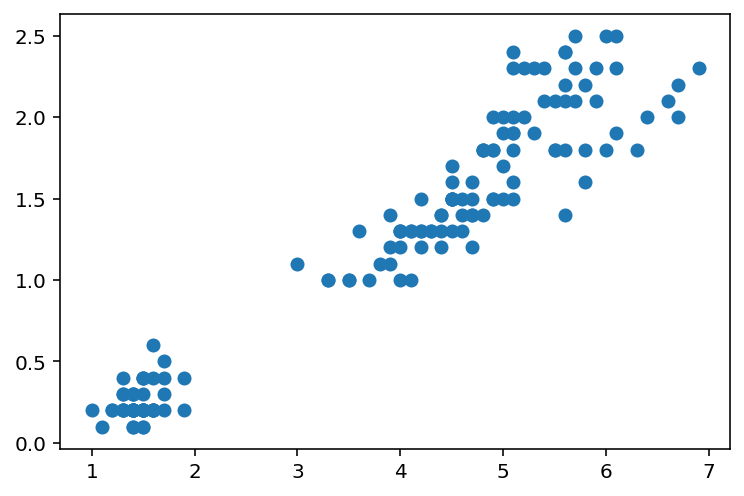

In [10]:
plt.figure()
plt.scatter(data['petal_length'], data['petal_width'])

#### Делаем изображение больше

Передаем параметр `figsize` в `figure`. Единицы измерения здесь относительные.

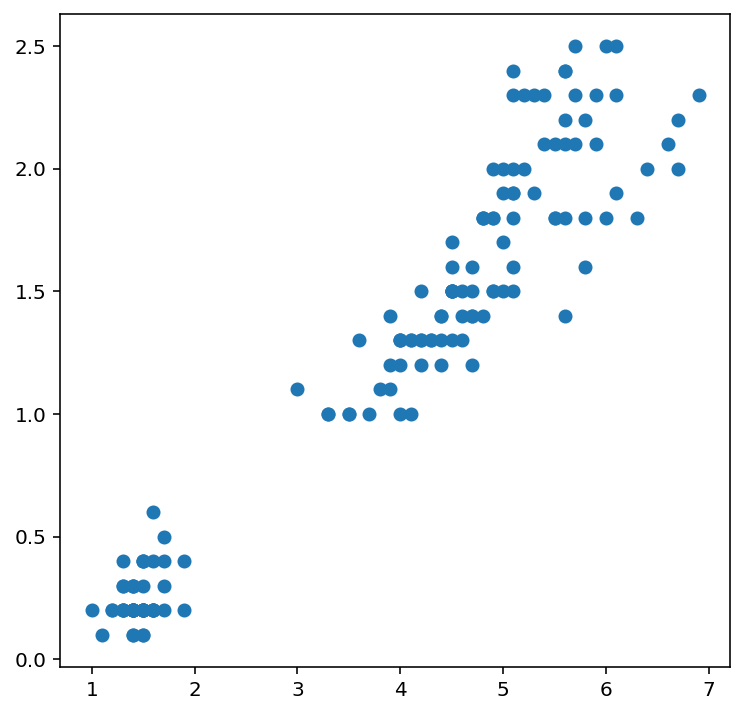

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(data['petal_length'], data['petal_width'])

#### Добавляем подписи осей и название графика

Здесь мы как раз используем то, что порядок осей такой же, как в математике 

Пример параметров графика: https://matplotlib.org/users/pyplot_tutorial.html

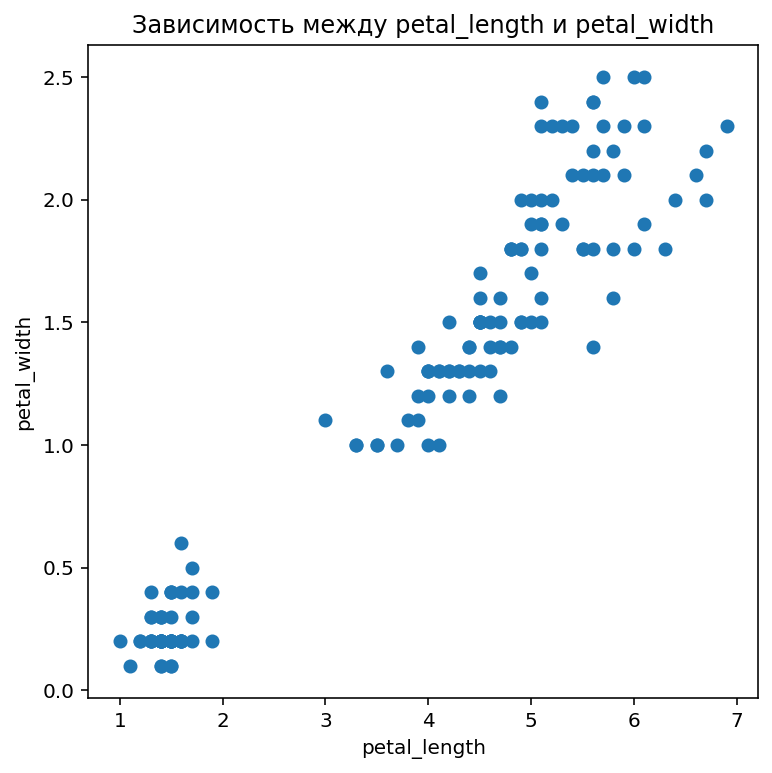

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(data['petal_length'], data['petal_width'])

plt.title('Зависимость между petal_length и petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width');

#### Раскрашиваем точки

Мы можем раскрасить все точки в один цвет, для этого используем аргумент `color`. Он принимает названия цветов на английском языке

Примеры цветов: https://matplotlib.org/examples/color/named_colors.html

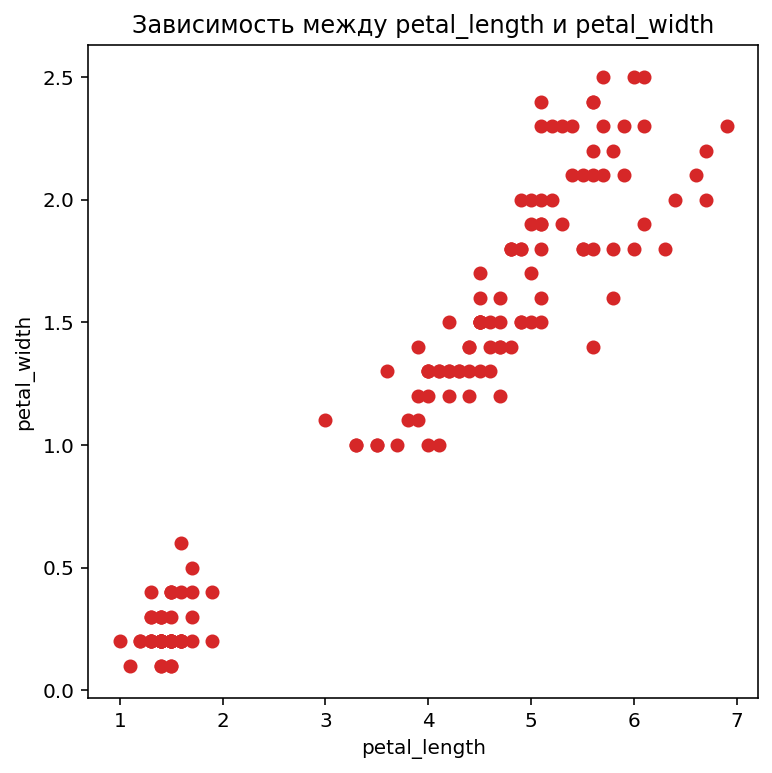

In [14]:
plt.figure(figsize=(6, 6))

plt.scatter(data['petal_length'], data['petal_width'], color='C3')

plt.title('Зависимость между petal_length и petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width');

Мы также можем раскрасить каждую точку в свой цвет, например, в соответствии с названием классов. 

Для этого используем аргумент `c` — он принимает числовые значения. Цвет в данном случае выбирается из стандартных (но и это можно менять). Такую функцию можно использовать, например, для того чтобы быстро посмотреть на распределение классов в данных.

In [15]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

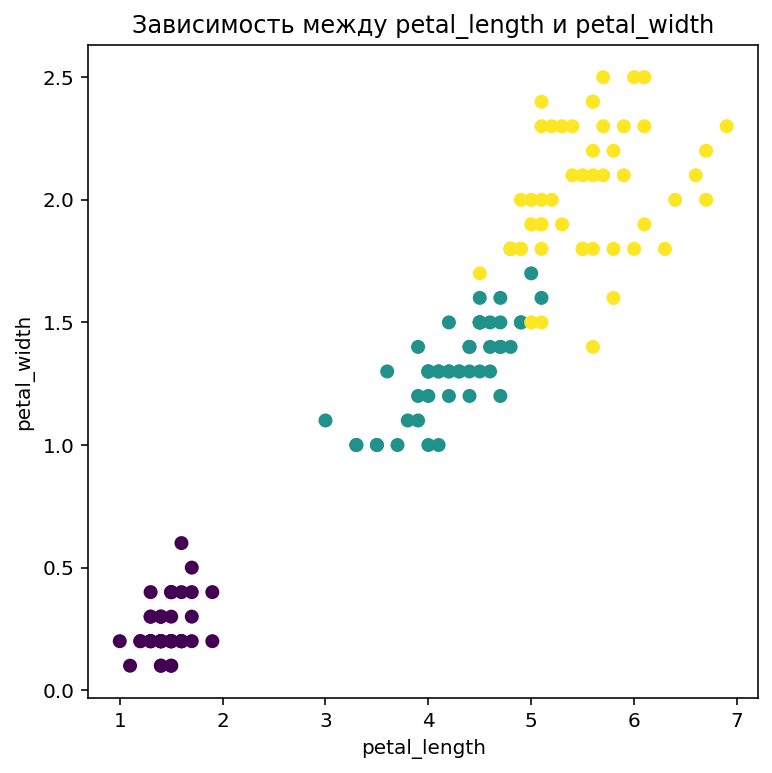

In [16]:
plt.figure(figsize=(6, 6))

plt.scatter(data['petal_length'], data['petal_width'], c=target)

plt.title('Зависимость между petal_length и petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width');

#### Добавляем легенду

Для того, чтобы добавить легенду, нужно использовать функцию `legend`. 

Однако, чтобы значения проставлялись автоматически, требуется указать `label` для каждого из видов точек. Немного изменим код и используем `dict` с подготовленными названиями классов:

In [17]:
classes


{0: 'Iris Setosa', 1: 'Iris Versicolour', 2: 'Iris Virginica'}

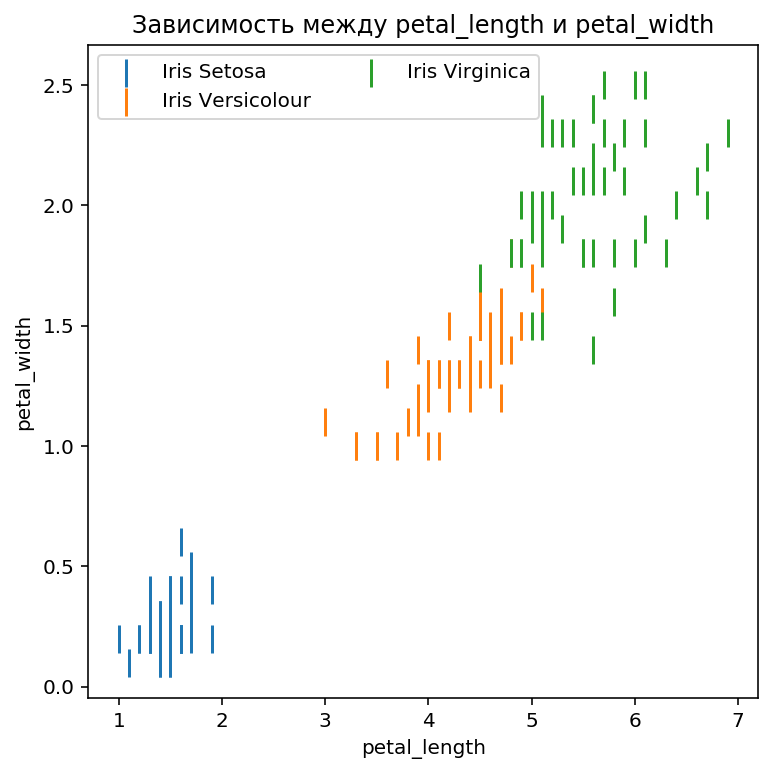

In [30]:
plt.figure(figsize=(6, 6))
plt.title('Зависимость между petal_length и petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

for class_idx in [0, 1, 2]:
    plt.scatter(
        data[data['class'] == class_idx]['petal_length'], 
        data[data['class'] == class_idx]['petal_width'],
        label=classes[class_idx], marker='|', s=200)
                                                                                                           
plt.legend(loc='best', ncol=2, )

Как видите, при построении графиков, можно свободно использовать возможности Python и его пакетов.

Более сложные графики обычно являются комбинациями перечисленных элементов и других. Принцип построения тот же — можно добавлять элементы практически независимо друг от друга. 

**Порядок следует соблюдать только в одном случае — если элемент, который требуется для правильной работы функции, еще не определен.** Например, если мы зададим `legend` раньше, чем `label`, пакет не поймет, что в нее вставить.

No handles with labels found to put in legend.


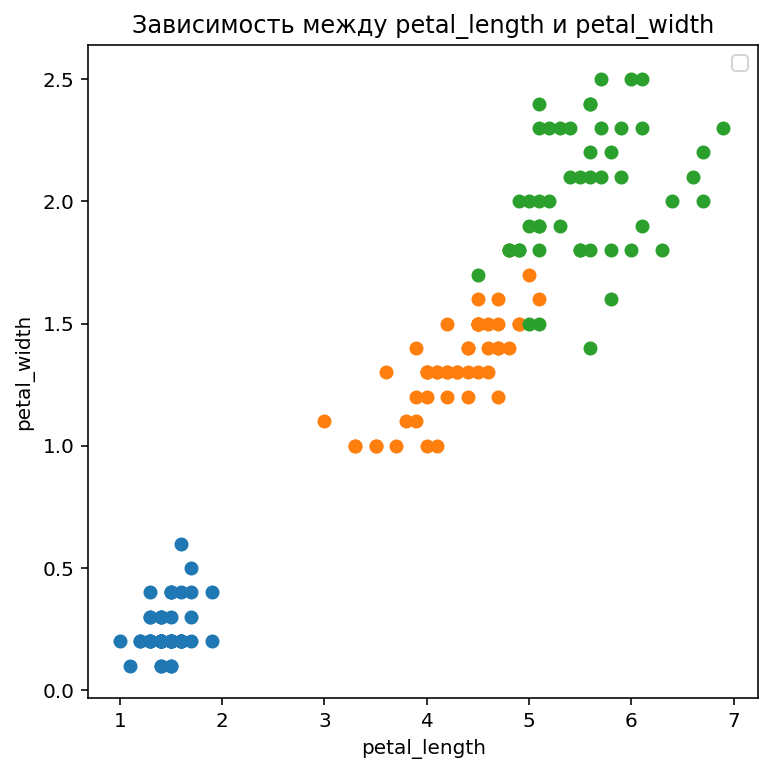

In [32]:
plt.figure(figsize=(6, 6))
plt.title('Зависимость между petal_length и petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.legend()

for class_idx in [0, 1, 2]:
    plt.scatter(
        data[data['class'] == class_idx]['petal_length'], 
        data[data['class'] == class_idx]['petal_width'],
        label=classes[class_idx]
    ) 

plt.savefig('fig.svg')

То же самое в другом порядке:

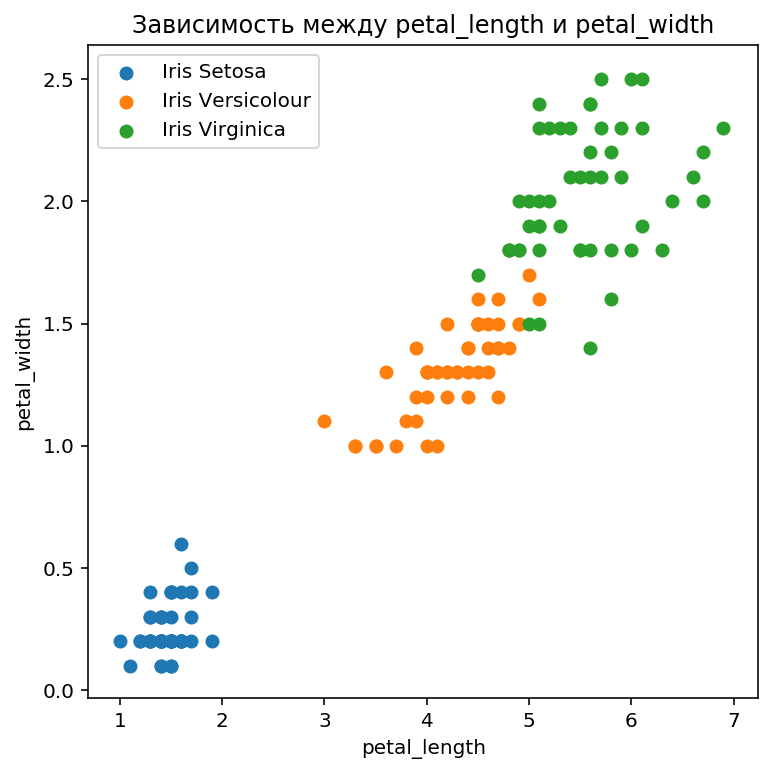

In [33]:
plt.figure(figsize=(6, 6))
plt.title('Зависимость между petal_length и petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

for class_idx in [0, 1, 2]:
    plt.scatter(
        data[data['class'] == class_idx]['petal_length'], 
        data[data['class'] == class_idx]['petal_width'],
        label=classes[class_idx]
    ) 

plt.legend()

plt.savefig('fig.svg')

# Больше про визуализацию

- Поговорим о том, зачем нужна визуализация данных 
- Затем рассмотрим некоторые типичные ошибки
- А в самом конце познакомимся с пакетом `seaborn`

# Часть 1: A picture is worth a 1000 words

Прежде чем говорить о визуализации данных, полезно будет представить или вспомнить, как устроен типичный процесс анализа данных. 

### Идеальный процесс решения задачи машинного обучения:

<a href="https://ibb.co/CKjZjBT"><img src="https://i.ibb.co/pjH8H29/ml-process.png" alt="ml-process" border="0"></a>



### Но в реальности все выглядит примерно так: 

<a href="https://ibb.co/W0W1Cs3"><img src="https://i.ibb.co/sCvr7tP/ml-full-process.png" alt="ml-full-process" border="0"></a>

#### Проблемы есть на всех шагах, которые от вас зависят:
- Задача не может быть поставлена так, как этого хотел заказчик
- Непонятно, чего хочет заказчик
- Мало данных
- Много данных, но нет полезных
- **Модель** — это все компоненты с предыдущего графика, там тоже много проблем
- **При построении модели приходится часто возвращаться на предыдущие шаги и уточнять задачу, требуемые данные, модель**

#### Но, даже если вы смогли преодолеть все трудности, нужно донести ваши результаты до заказчика:
- Не будет разбираться в устройстве модели
- Скорее всего, не знает смысл метрик и идеи алгоритмов
- Не будет тратить много времени на ваши результаты
- И многое другое

## Визуализация — способ представления результатов

### Зачем нужна визуализация данных?
Лучше один раз увидеть, чем сто раз услышать (или прочитать...)
- Увидеть закономерности в данных
- Донести эти закономерности до других людей
- Анализировать результаты быстрее и эффективнее

## Как делать в Python

### Пакеты:
- Базовые графики в `matplotlib`: https://matplotlib.org/tutorials/introductory/sample_plots.html
- Красивые графики из `seaborn`: https://seaborn.pydata.org/examples/index.html (синтаксис почти такой же + можно использовать функции из `matplotlib`)
- Интерактивные графики в `plotly`: https://plot.ly/python/ 
- Полезный сайт с примерами графиков в питоне: https://python-graph-gallery.com

# Часть 2. Типичные ошибки

Мы уже поняли, что **правильная** визуализация позволяет донести ваши результаты до других людей. Но что значит **правильная**? 

Конечно, мы не сможем дать точное определение или универсальный алгоритм действий. Вместо этого давайте рассмотрим важные компоненты любой визуализации, а также разберем некоторые примеры с типичными ошибками. 

## 1. Выбор типа графика

Часто проблема возникает еще на этапе выбора типа графика, поэтому полезно понимать, как правильно это делать. Сначала нужно разобраться в том, что вы хотите показать — зависимость, сравнение, распределение или что-то сложнее. Последующие вопросы зависят от конкретной задачи, пример можно увидеть на графике ниже

<img src="https://eazybi.com/static/img/blog_page/posts/2016_03_01/chart-selection-diagram.png" alt="drawing" width="900"/>

## 2. Подписи

### Ваш график должен понять человек, который не видел исходных данных и кода. 

Важно помнить о:
- Названии
- Подписях осей
- Единицах измерения
- Легенде
- В некоторых случаях сетке

### Но важно и не перестараться с обозначениями

В таких ситуациях подписи не помогают. Полезнее будет пересмотреть тип визуализации и понять, можно ли представить данные в более читабельном виде

<img src="http://blogscnew.wpengine.com/wp-content/uploads/2016/09/3.png" alt="drawing" width="500"/>

## 3. Сортировка данных

Некоторые типы графиков, например, bar chart, смотрятся гораздо лучше, если исходные данные отсортированы. Посмотрим на пример.

Данные [отсюда](https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature) (не следует рассматривать их как подходящие для серьезного анализа, так как данные приведены за разные годы, но для примера подойдет)

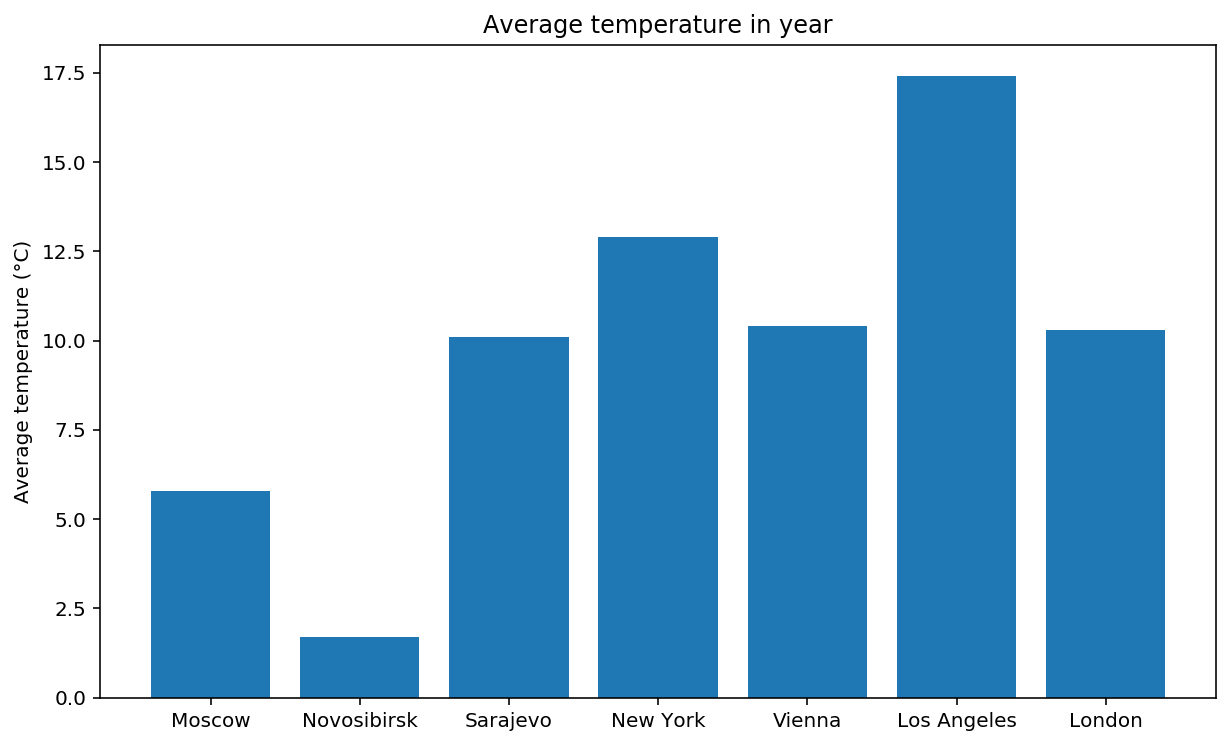

In [36]:
import numpy as np

# создадим маленький датасет

cities = np.array(['Moscow', 'Novosibirsk', 'Sarajevo', 'New York', 'Vienna', 'Los Angeles', 'London'])
avg_temperature = np.array([5.8, 1.7, 10.1, 12.9, 10.4, 17.4, 10.3])

# построим bar chart

plt.figure(figsize=(10, 6))
plt.bar(cities, avg_temperature)
plt.title('Average temperature in year')
plt.ylabel('Average temperature (°C)');

Видим, что сравнить Лондон, Вену и Сараево на таком графике достаточно тяжело. Отсортируем города по температуре. Теперь сравнить получается легче

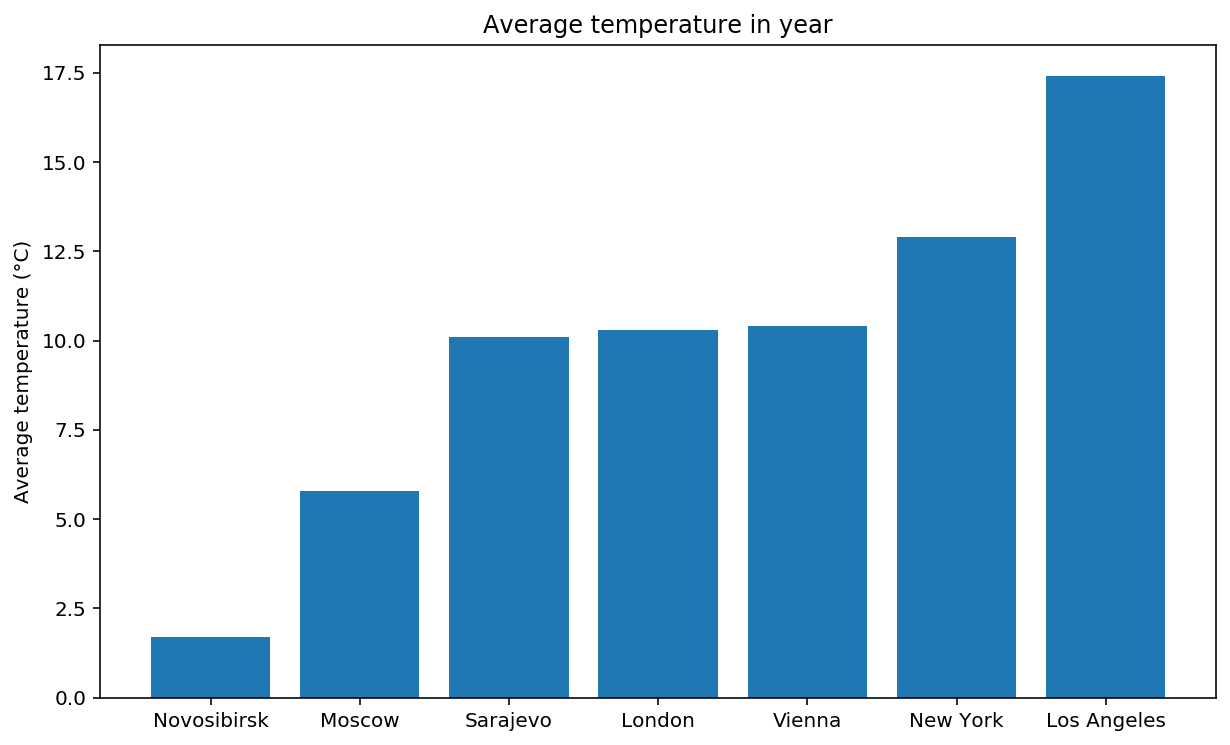

In [37]:
# отсортируем данные
sorted_avg_temperature = sorted(avg_temperature)

# проиндексируем города в соответствии с индексами данных
sorted_cities = cities[np.argsort(avg_temperature)]

plt.figure(figsize=(10, 6))
plt.bar(sorted_cities, sorted_avg_temperature)
plt.title('Average temperature in year')
plt.ylabel('Average temperature (°C)');

Сделаем график горизонтальным. Данные читаются еще лучше. В частности удобнее становится прочитать названия городов и имена осей

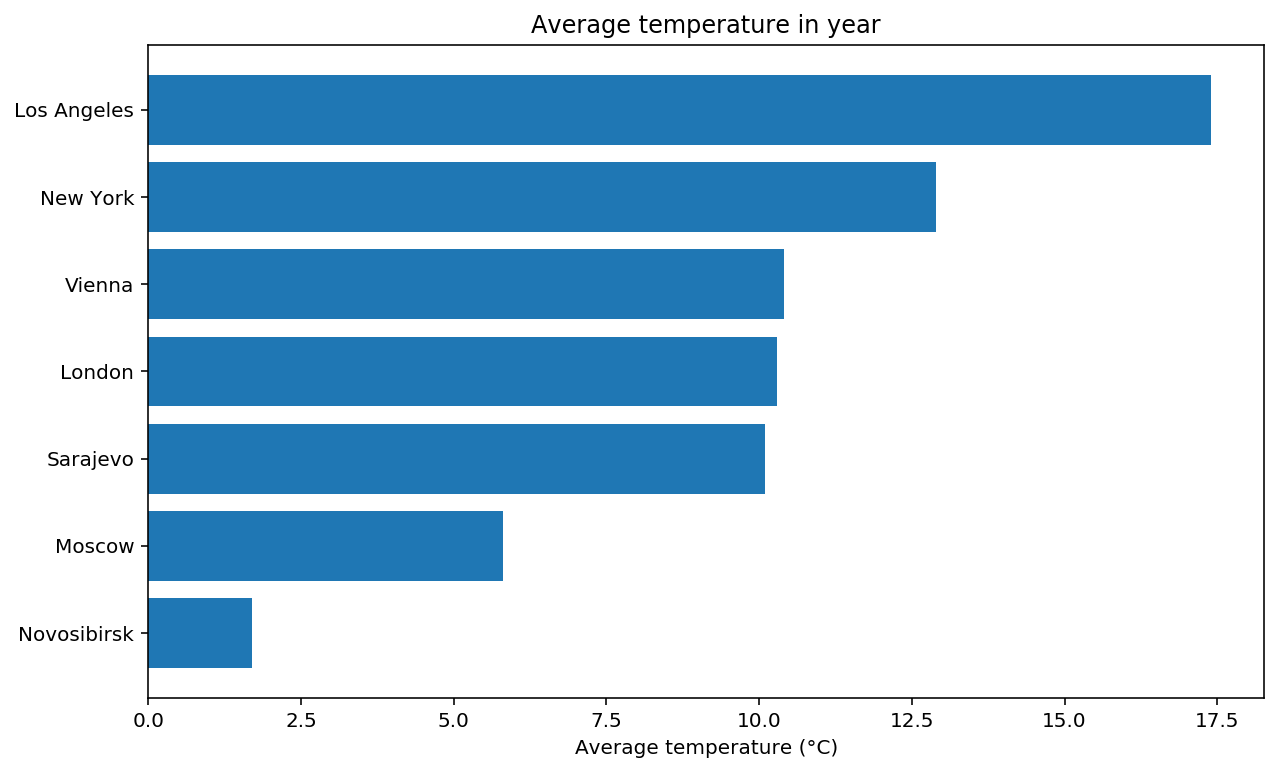

In [38]:
plt.figure(figsize=(10, 6))

# горизонтальный bar chart
plt.barh(sorted_cities, sorted_avg_temperature)  

plt.title('Average temperature in year')
plt.xlabel('Average temperature (°C)');

## 4. Pie chart

Споры про pie chart продолжаются, и, скорее всего, есть ситуации, где его использование оправдано (например, сравнение одной части «пирога» с остальными). Однако в большинстве случаев использование pie chart ведет к ошибкам в интерпретации. Cчитывать пропорции углов сложнее, чем площадь прямоугольников, поэтому лучше использовать bar chart. 

Посмотрим на пример:

In [0]:
data1 = [17, 18, 20, 22, 24]
data2 = [20, 18, 21, 20, 20]
data3 = [24, 23, 21, 19, 18]

labels = ['A', 'B', 'C', 'D', 'E']
colors = ['darksalmon', 'coral', 'olive', 'c', 'steelblue']

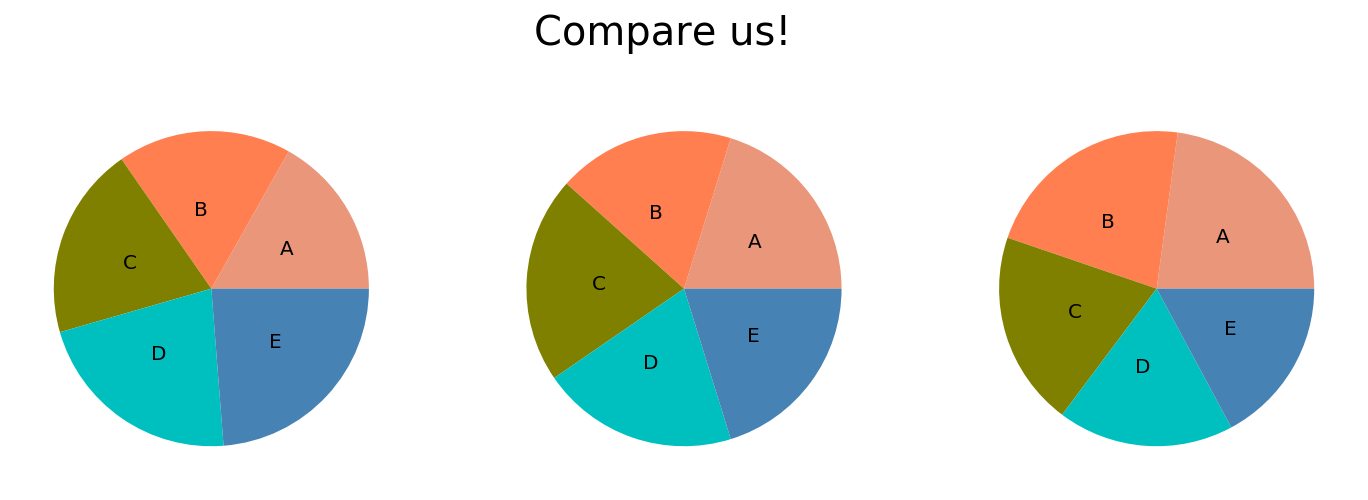

In [40]:
plt.figure(figsize=(12, 4))
plt.suptitle('Compare us!', fontsize=20)

plt.subplot(1, 3, 1)  # plt.subplot(nrows, ncols, index) 
plt.pie(data1, labels=labels, labeldistance=0.5, colors=colors)

plt.subplot(1, 3, 2)  
plt.pie(data2, labels=labels, labeldistance=0.5, colors=colors)

plt.subplot(1, 3, 3)  
plt.pie(data3, labels=labels, labeldistance=0.5, colors=colors);

Этот же график в виде bar chart

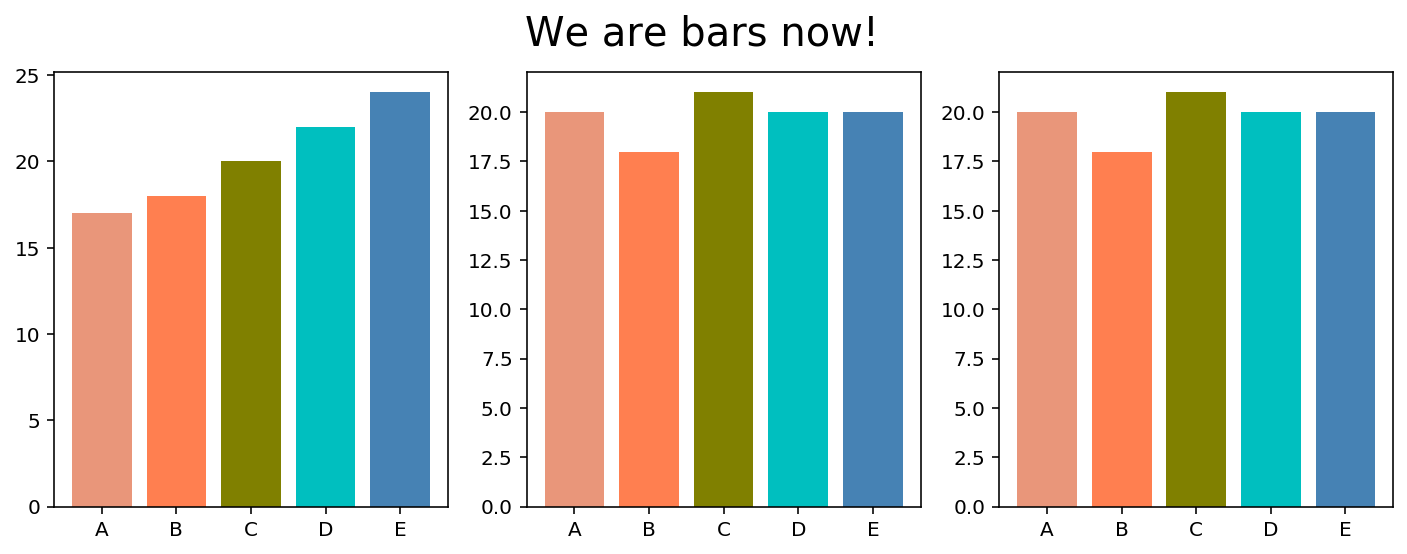

In [53]:
plt.figure(figsize=(12, 4))
plt.suptitle('We are bars now!', fontsize=20)

plt.subplot(1, 3, 1)  # plt.subplot(nrows, ncols, index) 
plt.bar(labels, data1, color=colors)

plt.subplot(1, 3, 2)  
plt.bar(labels, data2, color=colors)

plt.subplot(1, 3, 3) 
plt.bar(labels, data2, color=colors);

Бонус: сравниваем значения в разных чартах:

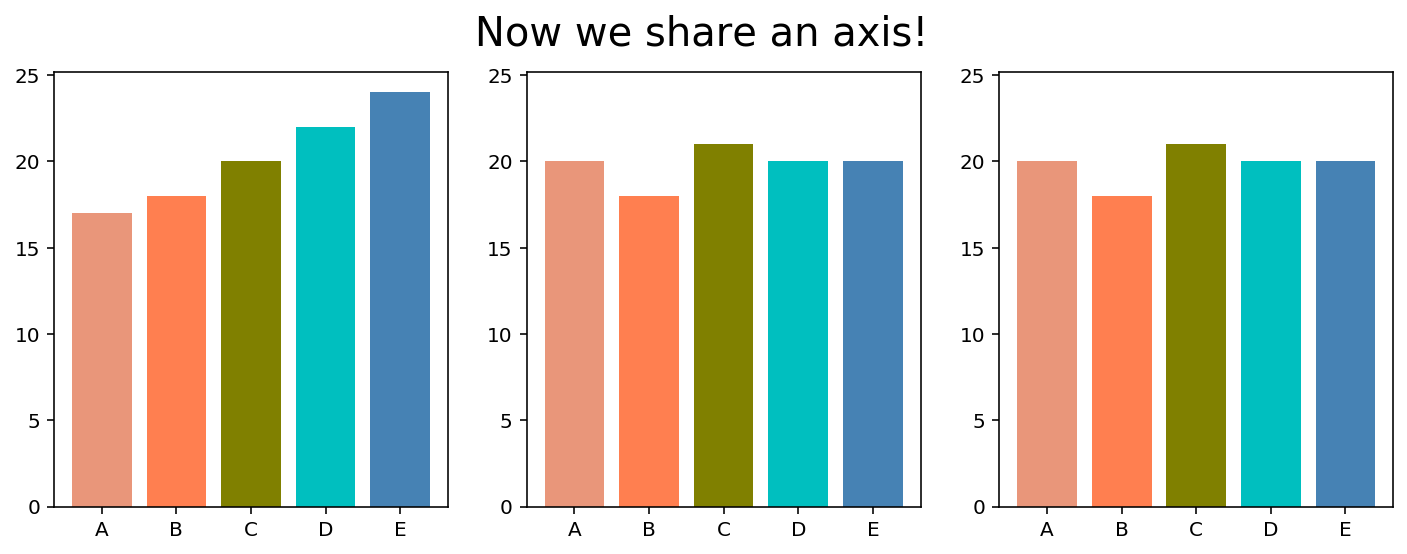

In [56]:
plt.figure(figsize=(12, 4))
plt.suptitle('Now we share an axis!', fontsize=20)

# plt.subplots(3, 1, sharey=True)
axes = plt.subplot(1, 3, 1)  # plt.subplot(nrows, ncols, index) 
plt.bar(labels, data1, color=colors)

plt.subplot(1, 3, 2, sharey=axes)  
plt.bar(labels, data2, color=colors)

plt.subplot(1, 3, 3, sharey=axes) 
plt.bar(labels, data2, color=colors);

## 5. Примеры для (анти)вдохновения

#### Углы кусков пиццы не соотносятся со значениями

<img src="https://cdn-images-1.medium.com/max/1600/0*oQNbbH-KkZAInmqo.jpg" alt="drawing" width="500"/>

#### 3D всегда искажает пропорции, считывать информацию невозможно

Попробуйте понять, какая высота у столбцов в середине

<img src="https://kaijiezhou.files.wordpress.com/2016/01/3d-bar-chart-2.png" alt="drawing" width="500"/>

#### Это деньги? Или это айфоны? 

<img src="https://www.statschat.org.nz/wp-content/uploads/2013/09/iphone-sales.jpg" alt="drawing" width="700"/>


#### Можно было бы и расширить временной горизонт

<img src="https://psychminder.files.wordpress.com/2011/11/ngram-alien-abduct.png" alt="drawing" width="700"/>


#### Очень. Сложно.

<img src="https://www.eia.gov/totalenergy/data/annual/images/pecss_btu_2011_med.jpg" alt="drawing" width="700"/>

Footnotes:
1. Does not include biofuels that have been blended with petroleum–biofuels are included in "Renewable Energy."
2. Excludes supplemental gaseous fuels.
3. Includes less than 0.1 quadrillion Btu of coal coke net exports.
4. Conventional hydroelectric power, geothermal, solar/PV, wind, and biomass.
5. Includes industrial combined-heat-and-power (CHP) and industrial electricity-only plants.
6. Includes commercial combined-heat-and-power (CHP) and commercial electricity-only plants.
7. Electricity-only and combined-heat-and-power (CHP) plants whose primary business is to sell electricity, or electricity and heat, to the public. Includes 0.1 quadrillion Btu of electricity net imports not shown under "Source."

Notes:
- Primary energy in the form that it is first accounted for in a statistical energy balance, before any transformation to secondary or tertiary forms of energy (for example, coal is used to generate electricity).  
- Sum of components may not equal total due to independent rounding.


#### Еще примеры ошибок

- https://viz.wtf (давайте посмотрим!)
- https://www.data-to-viz.com/caveats.html (типичные ошибки)
- И еще https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368

# Часть 3. `Seaborn` — хорошее дополнение к `matplotlib`

Вспомним датасет про виды ирисов (и то, что мы потратили половину пары, чтобы нарисовать осмысленный график). Сделаем то же самое, только при помощи пакета `seaborn`.

Загружаем данные:

In [0]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

In [58]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Строим график одной строчкой (!) для всех (!!) переменных

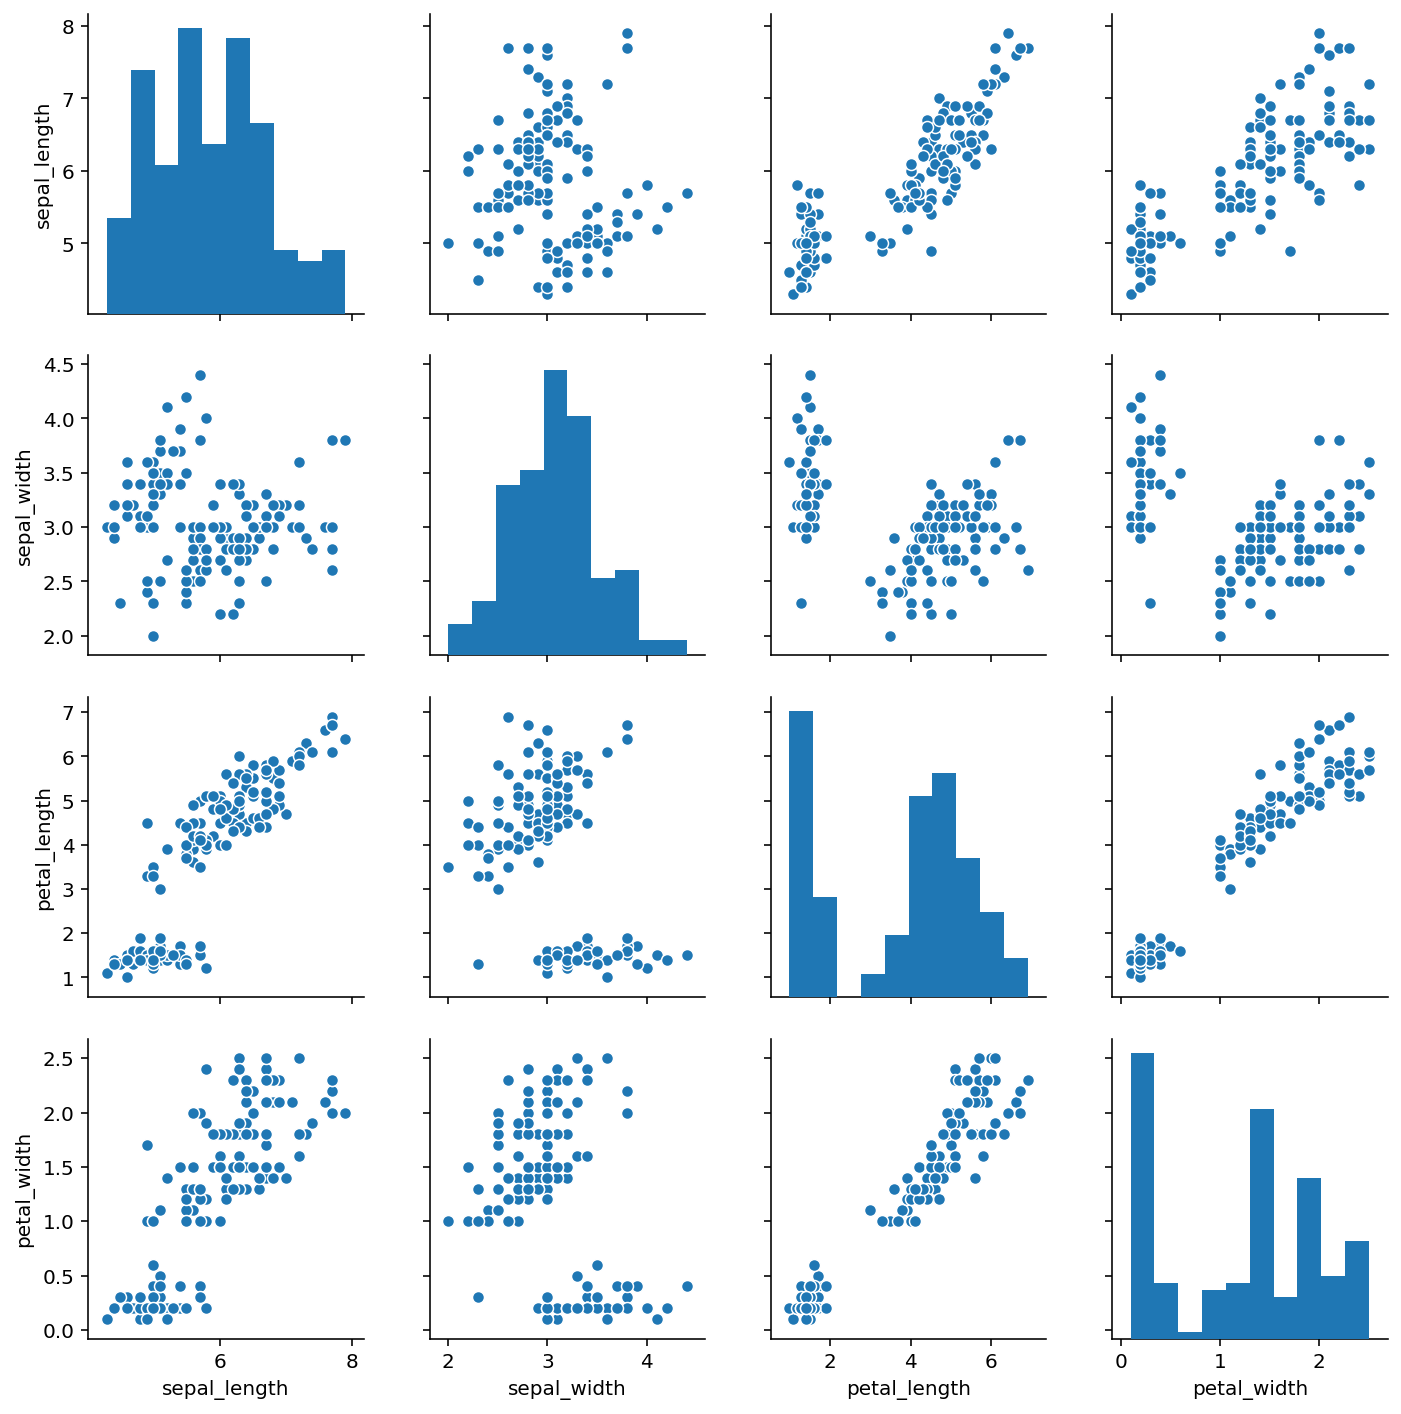

In [59]:
sns.pairplot(iris)

Осталось только добавить цвета

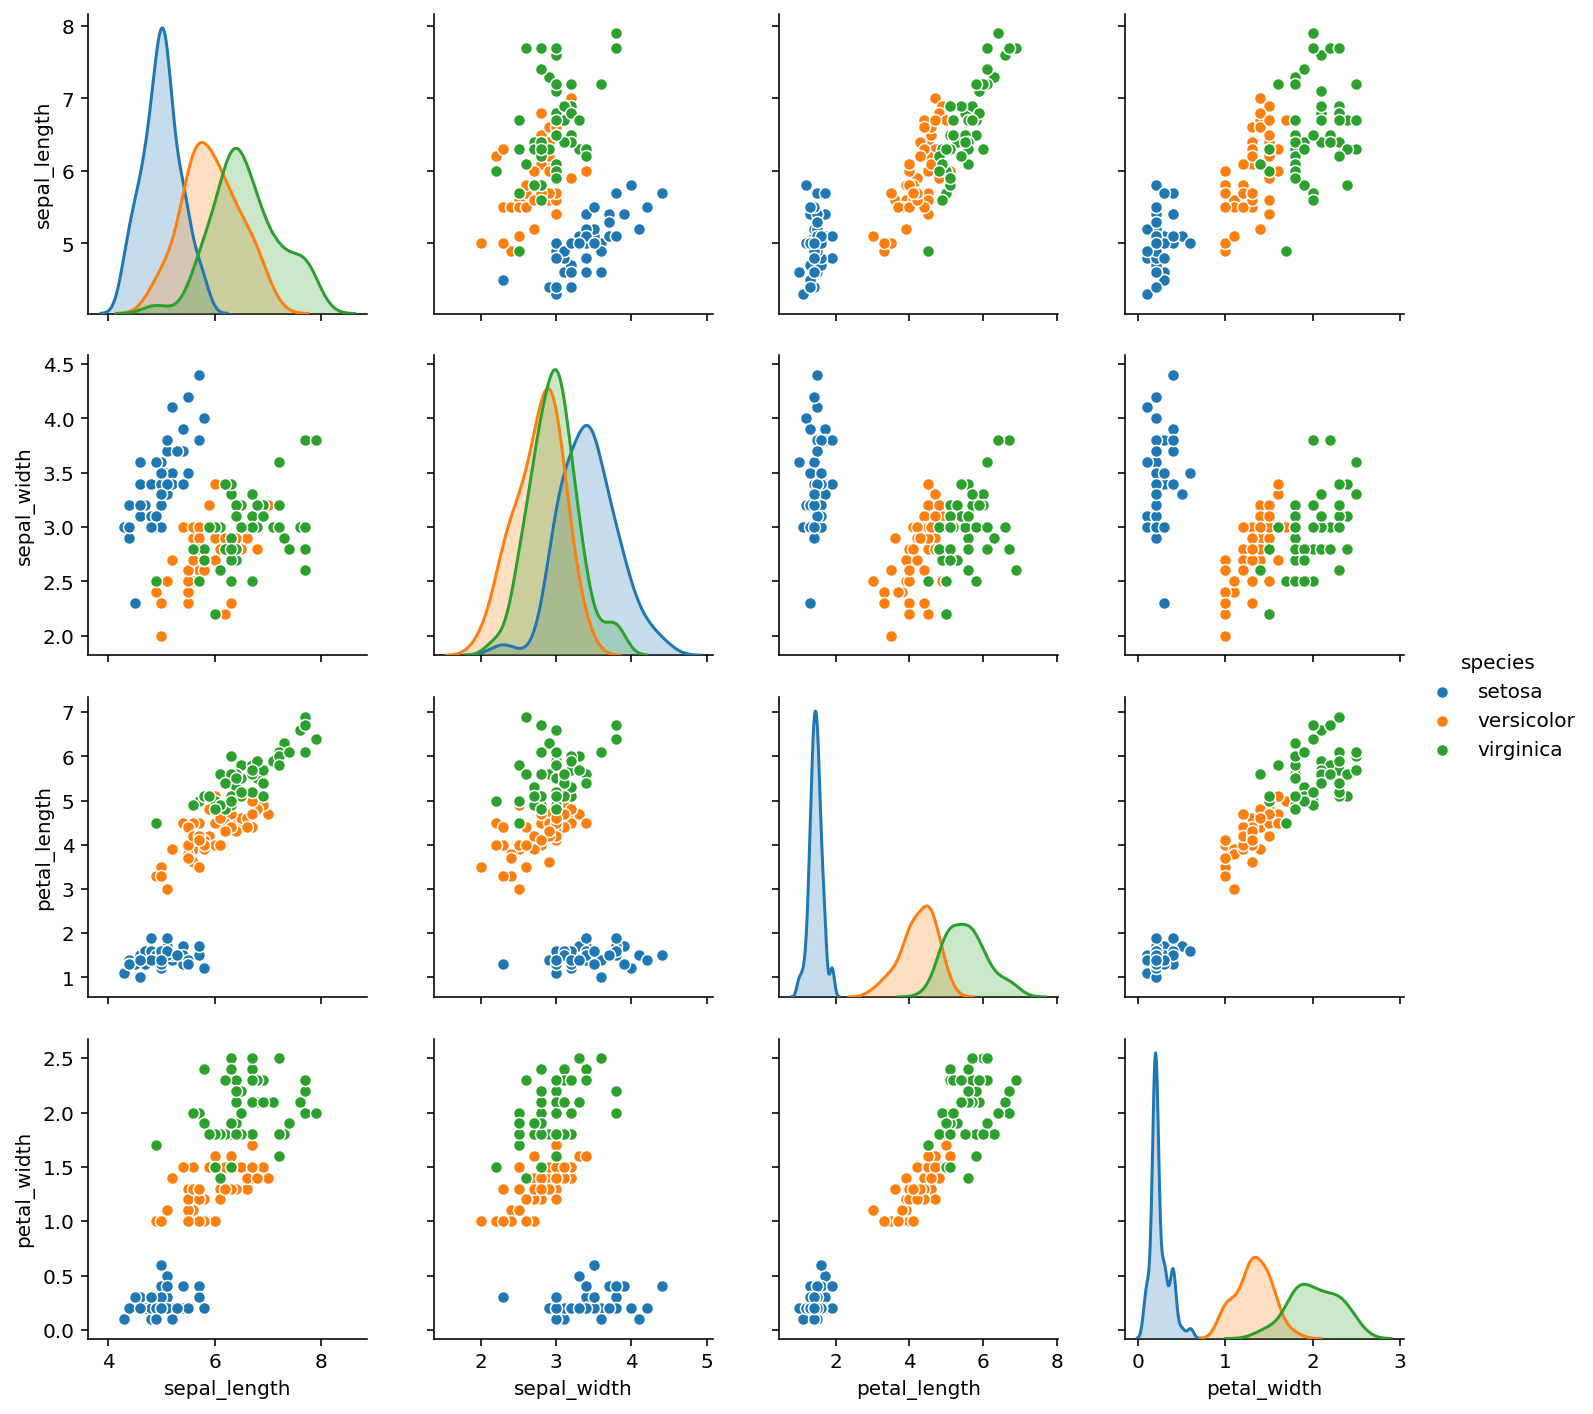

In [60]:
sns.pairplot(iris, hue='species')

Можно еще:
- поменять разные детали, как в `matplotlib` (правда названия немного отличаются)
- выбрать переменные, по которым строить график
- выбрать формат графиков на диагонали и вне диагонали
- использовать функции `matplotlib` 

Похожим образом работают другие функции `seaborn`, смотреть здесь: https://seaborn.pydata.org/tutorial.html

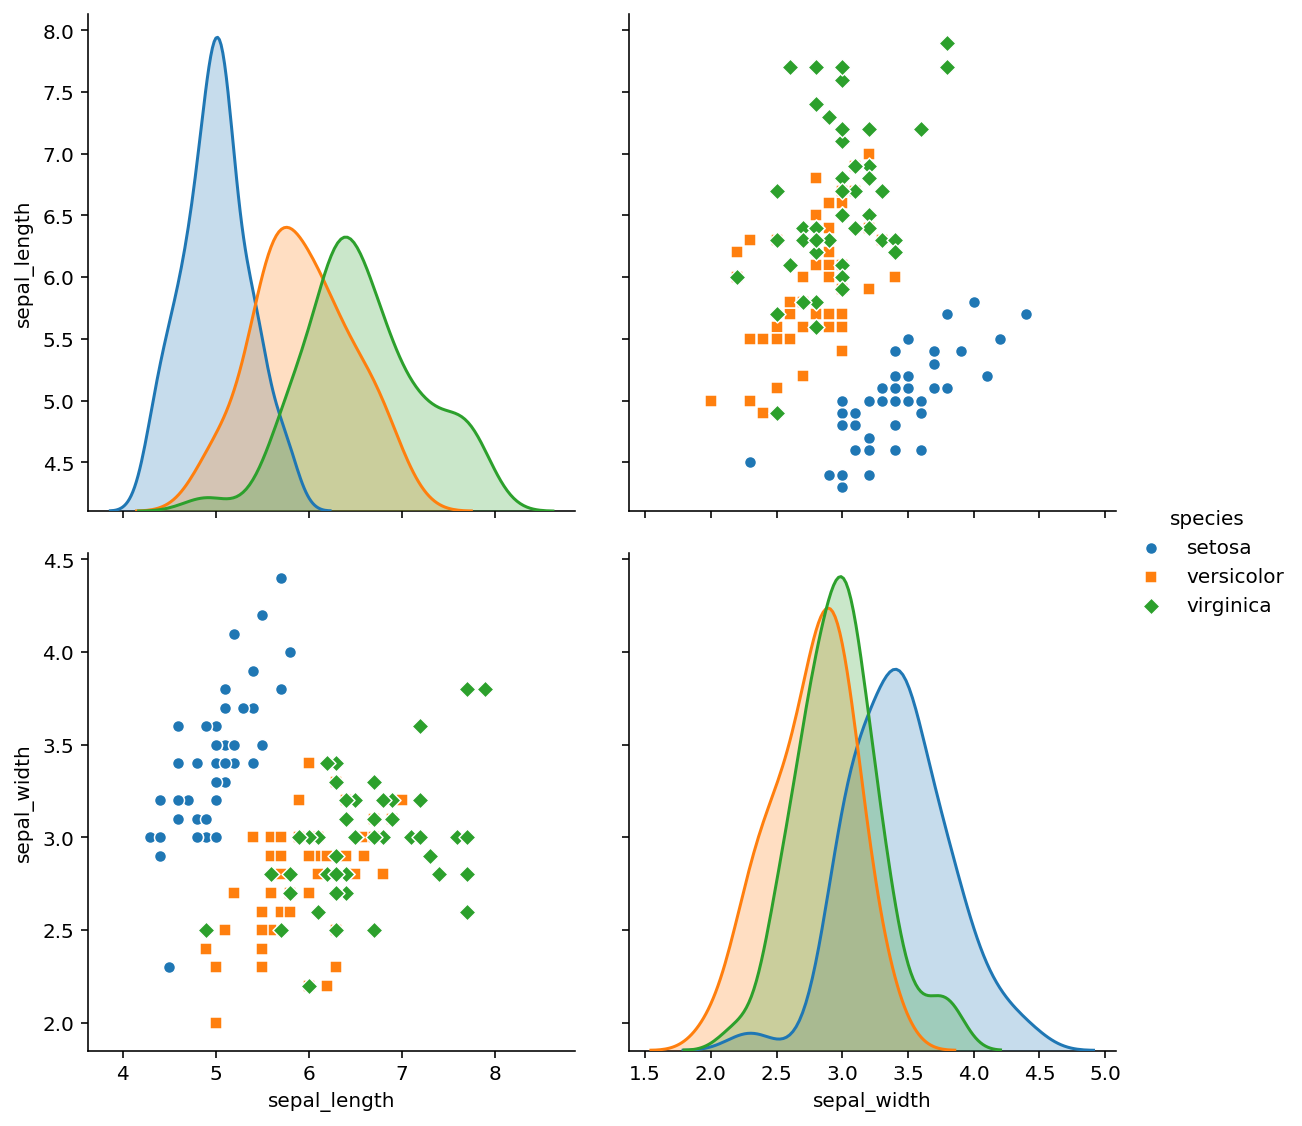

In [61]:
sns.pairplot(iris, hue='species', vars=['sepal_length', 'sepal_width'], markers=["o", "s", "D"], height=4)